### **Notepad for Dissertation TL Fine tuning with low learning rate for six pretrained models using NSL-KDD Datasets**
###for images with resolution 224 x 224


# NSL-KDD Dataset preparation using text to image conversion

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTrain%2B.txt'
test = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest%2B.txt'
test21 = 'https://raw.githubusercontent.com/sepahpourka/NSL-KDD-Datasets/main/KDDTest-21.txt'

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
#train_data = pd.read_csv(train,names=feature)
test_data = pd.read_csv(test,names=feature)
#data = pd.concat([train_data, test_data], ignore_index=True)
data = pd.concat([test_data], ignore_index=True)

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,11,0.0,0.00,0.0,0.0,1.00,0.00,0.18,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,5,10,0.0,0.00,0.0,0.0,1.00,0.00,0.20,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0.0,0.00,0.0,0.0,1.00,0.00,0.33,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [5]:
# Creating a dataframe with 50%
# values of original dataframe
data_train = data.sample(frac = 0.5)

# Creating dataframe with
# rest of the 50% values
data_test = data.drop(data_train.index)

In [6]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
11277,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,1,1.0,1.0,0.0,0.0,0.01,0.10,0.0,255,1,0.00,0.09,0.00,0.0,1.0,1.0,0.0,0.0,neptune,21
3536,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,245,245,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf,18
9898,0,tcp,http,SF,215,2683,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal,21
18947,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,254,1.00,0.01,0.02,0.0,0.0,0.0,0.0,0.0,normal,20
12958,0,icmp,eco_i,SF,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1,129,1.00,0.00,1.00,1.0,0.0,0.0,0.0,0.0,ipsweep,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16375,0,tcp,supdup,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,261,3,0.0,0.0,1.0,1.0,0.01,0.07,0.0,255,3,0.01,0.06,0.00,0.0,0.0,0.0,1.0,1.0,neptune,20
2218,0,tcp,systat,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,20,1.0,1.0,0.0,0.0,0.08,0.06,0.0,255,20,0.08,0.07,0.00,0.0,1.0,1.0,0.0,0.0,neptune,20
7340,0,tcp,http,SF,295,417,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal,21
4445,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,214,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf,18


In [7]:
i = data_train[(data_train.label == 'neptune')].index
len(i)

2346

In [8]:
data_train1 = data_train.drop(data_train[data_train['label'] == 'neptune'].index)


In [9]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
11277,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,1,1.0,1.0,0.0,0.0,0.01,0.10,0.0,255,1,0.00,0.09,0.00,0.0,1.0,1.0,0.0,0.0,neptune,21
3536,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,245,245,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf,18
9898,0,tcp,http,SF,215,2683,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal,21
18947,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,254,1.00,0.01,0.02,0.0,0.0,0.0,0.0,0.0,normal,20
12958,0,icmp,eco_i,SF,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1,129,1.00,0.00,1.00,1.0,0.0,0.0,0.0,0.0,ipsweep,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16375,0,tcp,supdup,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,261,3,0.0,0.0,1.0,1.0,0.01,0.07,0.0,255,3,0.01,0.06,0.00,0.0,0.0,0.0,1.0,1.0,neptune,20
2218,0,tcp,systat,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,237,20,1.0,1.0,0.0,0.0,0.08,0.06,0.0,255,20,0.08,0.07,0.00,0.0,1.0,1.0,0.0,0.0,neptune,20
7340,0,tcp,http,SF,295,417,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal,21
4445,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,214,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,smurf,18


In [10]:
data_train1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
3536,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,245,245,0.00,0.0,0.00,0.0,1.0,0.0,0.00,255,255,1.0,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf,18
9898,0,tcp,http,SF,215,2683,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.00,0.0,0.00,0.0,1.0,0.0,0.00,255,255,1.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal,21
18947,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.00,0.0,0.00,0.0,1.0,0.0,0.00,255,254,1.0,0.01,0.02,0.00,0.00,0.0,0.00,0.0,normal,20
12958,0,icmp,eco_i,SF,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.00,0.0,0.00,0.0,1.0,0.0,0.00,1,129,1.0,0.00,1.00,1.00,0.00,0.0,0.00,0.0,ipsweep,15
10942,0,tcp,http,SF,297,4894,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.00,0.0,0.00,0.0,1.0,0.0,0.67,255,255,1.0,0.00,0.01,0.00,0.00,0.0,0.00,0.0,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16367,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,331,1,0.15,0.0,0.83,1.0,0.0,1.0,0.00,255,1,0.0,0.98,0.00,0.00,0.18,0.0,0.78,1.0,satan,17
7719,0,tcp,http,SF,211,59205,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,21,0.00,0.0,0.00,0.0,1.0,0.0,0.00,105,255,1.0,0.00,0.01,0.05,0.01,0.0,0.00,0.0,normal,21
7340,0,tcp,http,SF,295,417,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.00,0.0,0.00,0.0,1.0,0.0,0.00,255,255,1.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,normal,21
4445,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,214,214,0.00,0.0,0.00,0.0,1.0,0.0,0.00,255,255,1.0,0.00,1.00,0.00,0.00,0.0,0.00,0.0,smurf,18


In [11]:
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
10,0,tcp,telnet,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9
13,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,120,1.0,1.0,0.0,0.0,1.00,0.00,0.00,235,171,0.73,0.07,0.00,0.00,0.69,0.95,0.02,0.00,neptune,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22535,0,tcp,http,SF,280,6087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,5,255,1.00,0.00,0.20,0.04,0.00,0.00,0.00,0.00,normal,21
22536,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,18,0.0,0.0,1.0,1.0,0.14,0.06,0.00,255,18,0.07,0.05,0.00,0.00,0.00,0.00,1.00,1.00,neptune,20
22538,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,53,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf,20
22539,0,tcp,smtp,SF,794,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21


In [12]:
i = data_test[(data_test.label == 'neptune')].index
len(i)

2311

In [13]:
# Redistribute across common attack class
# Type of attacks: DoS (Denial of Service attacks), R2L (Root to Local attacks), U2R (User to Root attack) and Probe (Probing attacks).
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'abnormal',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'abnormal',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'abnormal',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'abnormal',inplace=True)

change_label(data_train)
change_label(data_train1)
change_label(data_test)

In [14]:
# distribution of attack classes
data_train.label.value_counts()

abnormal    6435
normal      4837
Name: label, dtype: int64

In [15]:
# distribution of attack classes
data_train1.label.value_counts()

normal      4837
abnormal    4089
Name: label, dtype: int64

In [16]:
# distribution of attack classes
data_test.label.value_counts()

abnormal    6398
normal      4874
Name: label, dtype: int64

In [17]:
df_train = pd.DataFrame(data_train)

df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
11277,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,1,1.0,1.0,0.0,0.0,0.01,0.1,0.0,255,1,0.0,0.09,0.00,0.0,1.0,1.0,0.0,0.0,abnormal,21
3536,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,245,245,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,abnormal,18
9898,0,tcp,http,SF,215,2683,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,255,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal,21
18947,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.00,0.0,0.0,255,254,1.0,0.01,0.02,0.0,0.0,0.0,0.0,0.0,normal,20
12958,0,icmp,eco_i,SF,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.0,0.0,1,129,1.0,0.00,1.00,1.0,0.0,0.0,0.0,0.0,abnormal,15


In [18]:
df_train1 = pd.DataFrame(data_train1)

df_train1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
3536,0,icmp,ecr_i,SF,1008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,245,245,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,255,1.0,0.00,1.00,0.0,0.0,0.0,0.0,0.0,abnormal,18
9898,0,tcp,http,SF,215,2683,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,23,23,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,255,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,normal,21
18947,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,254,1.0,0.01,0.02,0.0,0.0,0.0,0.0,0.0,normal,20
12958,0,icmp,eco_i,SF,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1,129,1.0,0.00,1.00,1.0,0.0,0.0,0.0,0.0,abnormal,15
10942,0,tcp,http,SF,297,4894,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,255,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal,21


In [19]:
df_test = pd.DataFrame(data_test)

df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,abnormal,15
10,0,tcp,telnet,SF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,128,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,abnormal,9
13,0,tcp,telnet,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,120,1.0,1.0,0.0,0.0,1.0,0.0,0.0,235,171,0.73,0.07,0.00,0.00,0.69,0.95,0.02,0.00,abnormal,18


In [20]:
df_train['information'] = df_train['duration'].astype(str) + " "+ df_train['protocol_type'].astype(str) + " "+ df_train['service'].astype(str) + " "+ df_train['flag'].astype(str) + " "+ df_train['src_bytes'].astype(str) + " "+ df_train['dst_bytes'].astype(str) + " "+ df_train['land'].astype(str) + " "+ df_train['wrong_fragment'].astype(str) + " "+ df_train['urgent'].astype(str) + " "+ df_train['hot'].astype(str) + " "+ df_train['num_failed_logins'].astype(str) + " "+ df_train['logged_in'].astype(str) + " "+ df_train['num_compromised'].astype(str) + " "+ df_train['root_shell'].astype(str) + " "+ df_train['su_attempted'].astype(str) + " "+ df_train['num_root'].astype(str) + " "+ df_train['num_file_creations'].astype(str) + " "+ df_train['num_shells'].astype(str) + " "+ df_train['num_access_files'].astype(str) + " "+ df_train['num_outbound_cmds'].astype(str) + " "+ df_train['is_host_login'].astype(str) + " "+ df_train['is_guest_login'].astype(str) + " "+ df_train['count'].astype(str) + " "+ df_train['srv_count'].astype(str) + " "+ df_train['serror_rate'].astype(str) + " "+ df_train['srv_serror_rate'].astype(str) + " "+ df_train['rerror_rate'].astype(str) + " "+ df_train['srv_rerror_rate'].astype(str) + " "+ df_train['same_srv_rate'].astype(str) + " "+ df_train['diff_srv_rate'].astype(str) + " "+ df_train['srv_diff_host_rate'].astype(str) + " "+ df_train['dst_host_count'].astype(str) + " "+ df_train['dst_host_srv_count'].astype(str) + " "+ df_train['dst_host_same_srv_rate'].astype(str) + " "+ df_train['dst_host_diff_srv_rate'].astype(str) + " "+ df_train['dst_host_same_src_port_rate'].astype(str) + " "+ df_train['dst_host_srv_diff_host_rate'].astype(str) + " "+ df_train['dst_host_serror_rate'].astype(str) + " "+ df_train['dst_host_srv_serror_rate'].astype(str) + " "+ df_train['dst_host_rerror_rate'].astype(str) + " "+ df_train['dst_host_srv_rerror_rate'].astype(str)


# remove attribute 'difficulty_level'
df_train.drop(['duration'],axis=1,inplace=True)
df_train.drop(['protocol_type'],axis=1,inplace=True)
df_train.drop(['service'],axis=1,inplace=True)
df_train.drop(['flag'],axis=1,inplace=True)
df_train.drop(['src_bytes'],axis=1,inplace=True)
df_train.drop(['dst_bytes'],axis=1,inplace=True)
df_train.drop(['land'],axis=1,inplace=True)
df_train.drop(['wrong_fragment'],axis=1,inplace=True)
df_train.drop(['urgent'],axis=1,inplace=True)
df_train.drop(['hot'],axis=1,inplace=True)
df_train.drop(['num_failed_logins'],axis=1,inplace=True)
df_train.drop(['logged_in'],axis=1,inplace=True)
df_train.drop(['num_compromised'],axis=1,inplace=True)
df_train.drop(['root_shell'],axis=1,inplace=True)
df_train.drop(['su_attempted'],axis=1,inplace=True)
df_train.drop(['num_root'],axis=1,inplace=True)
df_train.drop(['num_file_creations'],axis=1,inplace=True)
df_train.drop(['num_shells'],axis=1,inplace=True)
df_train.drop(['num_access_files'],axis=1,inplace=True)
df_train.drop(['num_outbound_cmds'],axis=1,inplace=True)
df_train.drop(['is_host_login'],axis=1,inplace=True)
df_train.drop(['is_guest_login'],axis=1,inplace=True)
df_train.drop(['count'],axis=1,inplace=True)
df_train.drop(['srv_count'],axis=1,inplace=True)
df_train.drop(['serror_rate'],axis=1,inplace=True)
df_train.drop(['srv_serror_rate'],axis=1,inplace=True)
df_train.drop(['rerror_rate'],axis=1,inplace=True)
df_train.drop(['srv_rerror_rate'],axis=1,inplace=True)
df_train.drop(['same_srv_rate'],axis=1,inplace=True)
df_train.drop(['diff_srv_rate'],axis=1,inplace=True)
df_train.drop(['srv_diff_host_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_count'],axis=1,inplace=True)
df_train.drop(['dst_host_srv_count'],axis=1,inplace=True)
df_train.drop(['dst_host_same_srv_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_diff_srv_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_same_src_port_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_srv_diff_host_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_serror_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_srv_serror_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_rerror_rate'],axis=1,inplace=True)
df_train.drop(['dst_host_srv_rerror_rate'],axis=1,inplace=True)
df_train.drop(['difficulty'],axis=1,inplace=True)

df_train.head()

,label,information
11277,abnormal,0 tcp private S0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
3536,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...
9898,normal,0 tcp http SF 215 2683 0 0 0 0 0 1 0 0 0 0 0 0...
18947,normal,0 udp private SF 105 146 0 0 0 0 0 0 0 0 0 0 0...
12958,abnormal,0 icmp eco_i SF 18 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [21]:
df_train

,label,information
11277,abnormal,0 tcp private S0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
3536,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...
9898,normal,0 tcp http SF 215 2683 0 0 0 0 0 1 0 0 0 0 0 0...
18947,normal,0 udp private SF 105 146 0 0 0 0 0 0 0 0 0 0 0...
12958,abnormal,0 icmp eco_i SF 18 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
...,...,...
16375,abnormal,0 tcp supdup REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2218,abnormal,0 tcp systat S0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7340,normal,0 tcp http SF 295 417 0 0 0 0 0 1 0 0 0 0 0 0 ...
4445,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [22]:
df_train1['information'] = df_train1['duration'].astype(str) + " "+ df_train1['protocol_type'].astype(str) + " "+ df_train1['service'].astype(str) + " "+ df_train1['flag'].astype(str) + " "+ df_train1['src_bytes'].astype(str) + " "+ df_train1['dst_bytes'].astype(str) + " "+ df_train1['land'].astype(str) + " "+ df_train1['wrong_fragment'].astype(str) + " "+ df_train1['urgent'].astype(str) + " "+ df_train1['hot'].astype(str) + " "+ df_train1['num_failed_logins'].astype(str) + " "+ df_train1['logged_in'].astype(str) + " "+ df_train1['num_compromised'].astype(str) + " "+ df_train1['root_shell'].astype(str) + " "+ df_train1['su_attempted'].astype(str) + " "+ df_train1['num_root'].astype(str) + " "+ df_train1['num_file_creations'].astype(str) + " "+ df_train1['num_shells'].astype(str) + " "+ df_train1['num_access_files'].astype(str) + " "+ df_train1['num_outbound_cmds'].astype(str) + " "+ df_train1['is_host_login'].astype(str) + " "+ df_train1['is_guest_login'].astype(str) + " "+ df_train1['count'].astype(str) + " "+ df_train1['srv_count'].astype(str) + " "+ df_train1['serror_rate'].astype(str) + " "+ df_train1['srv_serror_rate'].astype(str) + " "+ df_train1['rerror_rate'].astype(str) + " "+ df_train1['srv_rerror_rate'].astype(str) + " "+ df_train1['same_srv_rate'].astype(str) + " "+ df_train1['diff_srv_rate'].astype(str) + " "+ df_train1['srv_diff_host_rate'].astype(str) + " "+ df_train1['dst_host_count'].astype(str) + " "+ df_train1['dst_host_srv_count'].astype(str) + " "+ df_train1['dst_host_same_srv_rate'].astype(str) + " "+ df_train1['dst_host_diff_srv_rate'].astype(str) + " "+ df_train1['dst_host_same_src_port_rate'].astype(str) + " "+ df_train1['dst_host_srv_diff_host_rate'].astype(str) + " "+ df_train1['dst_host_serror_rate'].astype(str) + " "+ df_train1['dst_host_srv_serror_rate'].astype(str) + " "+ df_train1['dst_host_rerror_rate'].astype(str) + " "+ df_train1['dst_host_srv_rerror_rate'].astype(str)


# remove attribute 'difficulty_level'
df_train1.drop(['duration'],axis=1,inplace=True)
df_train1.drop(['protocol_type'],axis=1,inplace=True)
df_train1.drop(['service'],axis=1,inplace=True)
df_train1.drop(['flag'],axis=1,inplace=True)
df_train1.drop(['src_bytes'],axis=1,inplace=True)
df_train1.drop(['dst_bytes'],axis=1,inplace=True)
df_train1.drop(['land'],axis=1,inplace=True)
df_train1.drop(['wrong_fragment'],axis=1,inplace=True)
df_train1.drop(['urgent'],axis=1,inplace=True)
df_train1.drop(['hot'],axis=1,inplace=True)
df_train1.drop(['num_failed_logins'],axis=1,inplace=True)
df_train1.drop(['logged_in'],axis=1,inplace=True)
df_train1.drop(['num_compromised'],axis=1,inplace=True)
df_train1.drop(['root_shell'],axis=1,inplace=True)
df_train1.drop(['su_attempted'],axis=1,inplace=True)
df_train1.drop(['num_root'],axis=1,inplace=True)
df_train1.drop(['num_file_creations'],axis=1,inplace=True)
df_train1.drop(['num_shells'],axis=1,inplace=True)
df_train1.drop(['num_access_files'],axis=1,inplace=True)
df_train1.drop(['num_outbound_cmds'],axis=1,inplace=True)
df_train1.drop(['is_host_login'],axis=1,inplace=True)
df_train1.drop(['is_guest_login'],axis=1,inplace=True)
df_train1.drop(['count'],axis=1,inplace=True)
df_train1.drop(['srv_count'],axis=1,inplace=True)
df_train1.drop(['serror_rate'],axis=1,inplace=True)
df_train1.drop(['srv_serror_rate'],axis=1,inplace=True)
df_train1.drop(['rerror_rate'],axis=1,inplace=True)
df_train1.drop(['srv_rerror_rate'],axis=1,inplace=True)
df_train1.drop(['same_srv_rate'],axis=1,inplace=True)
df_train1.drop(['diff_srv_rate'],axis=1,inplace=True)
df_train1.drop(['srv_diff_host_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_count'],axis=1,inplace=True)
df_train1.drop(['dst_host_srv_count'],axis=1,inplace=True)
df_train1.drop(['dst_host_same_srv_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_diff_srv_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_same_src_port_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_srv_diff_host_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_serror_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_srv_serror_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_rerror_rate'],axis=1,inplace=True)
df_train1.drop(['dst_host_srv_rerror_rate'],axis=1,inplace=True)
df_train1.drop(['difficulty'],axis=1,inplace=True)


In [23]:
df_train1

,label,information
3536,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...
9898,normal,0 tcp http SF 215 2683 0 0 0 0 0 1 0 0 0 0 0 0...
18947,normal,0 udp private SF 105 146 0 0 0 0 0 0 0 0 0 0 0...
12958,abnormal,0 icmp eco_i SF 18 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
10942,normal,0 tcp http SF 297 4894 0 0 0 0 0 1 0 0 0 0 0 0...
...,...,...
16367,abnormal,0 tcp private REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7719,normal,0 tcp http SF 211 59205 0 0 0 0 0 1 0 0 0 0 0 ...
7340,normal,0 tcp http SF 295 417 0 0 0 0 0 1 0 0 0 0 0 0 ...
4445,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [24]:
df_test['information'] = df_test['duration'].astype(str) + " "+ df_test['protocol_type'].astype(str) + " "+ df_test['service'].astype(str) + " "+ df_test['flag'].astype(str) + " "+ df_test['src_bytes'].astype(str) + " "+ df_test['dst_bytes'].astype(str) + " "+ df_test['land'].astype(str) + " "+ df_test['wrong_fragment'].astype(str) + " "+ df_test['urgent'].astype(str) + " "+ df_test['hot'].astype(str) + " "+ df_test['num_failed_logins'].astype(str) + " "+ df_test['logged_in'].astype(str) + " "+ df_test['num_compromised'].astype(str) + " "+ df_test['root_shell'].astype(str) + " "+ df_test['su_attempted'].astype(str) + " "+ df_test['num_root'].astype(str) + " "+ df_test['num_file_creations'].astype(str) + " "+ df_test['num_shells'].astype(str) + " "+ df_test['num_access_files'].astype(str) + " "+ df_test['num_outbound_cmds'].astype(str) + " "+ df_test['is_host_login'].astype(str) + " "+ df_test['is_guest_login'].astype(str) + " "+ df_test['count'].astype(str) + " "+ df_test['srv_count'].astype(str) + " "+ df_test['serror_rate'].astype(str) + " "+ df_test['srv_serror_rate'].astype(str) + " "+ df_test['rerror_rate'].astype(str) + " "+ df_test['srv_rerror_rate'].astype(str) + " "+ df_test['same_srv_rate'].astype(str) + " "+ df_test['diff_srv_rate'].astype(str) + " "+ df_test['srv_diff_host_rate'].astype(str) + " "+ df_test['dst_host_count'].astype(str) + " "+ df_test['dst_host_srv_count'].astype(str) + " "+ df_test['dst_host_same_srv_rate'].astype(str) + " "+ df_test['dst_host_diff_srv_rate'].astype(str) + " "+ df_test['dst_host_same_src_port_rate'].astype(str) + " "+ df_test['dst_host_srv_diff_host_rate'].astype(str) + " "+ df_test['dst_host_serror_rate'].astype(str) + " "+ df_test['dst_host_srv_serror_rate'].astype(str) + " "+ df_test['dst_host_rerror_rate'].astype(str) + " "+ df_test['dst_host_srv_rerror_rate'].astype(str)


# remove attribute 'difficulty_level'
df_test.drop(['duration'],axis=1,inplace=True)
df_test.drop(['protocol_type'],axis=1,inplace=True)
df_test.drop(['service'],axis=1,inplace=True)
df_test.drop(['flag'],axis=1,inplace=True)
df_test.drop(['src_bytes'],axis=1,inplace=True)
df_test.drop(['dst_bytes'],axis=1,inplace=True)
df_test.drop(['land'],axis=1,inplace=True)
df_test.drop(['wrong_fragment'],axis=1,inplace=True)
df_test.drop(['urgent'],axis=1,inplace=True)
df_test.drop(['hot'],axis=1,inplace=True)
df_test.drop(['num_failed_logins'],axis=1,inplace=True)
df_test.drop(['logged_in'],axis=1,inplace=True)
df_test.drop(['num_compromised'],axis=1,inplace=True)
df_test.drop(['root_shell'],axis=1,inplace=True)
df_test.drop(['su_attempted'],axis=1,inplace=True)
df_test.drop(['num_root'],axis=1,inplace=True)
df_test.drop(['num_file_creations'],axis=1,inplace=True)
df_test.drop(['num_shells'],axis=1,inplace=True)
df_test.drop(['num_access_files'],axis=1,inplace=True)
df_test.drop(['num_outbound_cmds'],axis=1,inplace=True)
df_test.drop(['is_host_login'],axis=1,inplace=True)
df_test.drop(['is_guest_login'],axis=1,inplace=True)
df_test.drop(['count'],axis=1,inplace=True)
df_test.drop(['srv_count'],axis=1,inplace=True)
df_test.drop(['serror_rate'],axis=1,inplace=True)
df_test.drop(['srv_serror_rate'],axis=1,inplace=True)
df_test.drop(['rerror_rate'],axis=1,inplace=True)
df_test.drop(['srv_rerror_rate'],axis=1,inplace=True)
df_test.drop(['same_srv_rate'],axis=1,inplace=True)
df_test.drop(['diff_srv_rate'],axis=1,inplace=True)
df_test.drop(['srv_diff_host_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_count'],axis=1,inplace=True)
df_test.drop(['dst_host_srv_count'],axis=1,inplace=True)
df_test.drop(['dst_host_same_srv_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_diff_srv_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_same_src_port_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_srv_diff_host_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_serror_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_srv_serror_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_rerror_rate'],axis=1,inplace=True)
df_test.drop(['dst_host_srv_rerror_rate'],axis=1,inplace=True)
df_test.drop(['difficulty'],axis=1,inplace=True)

df_test.head()

,label,information
2,normal,2 tcp ftp_data SF 12983 0 0 0 0 0 0 0 0 0 0 0 ...
5,normal,0 tcp http SF 267 14515 0 0 0 0 0 1 0 0 0 0 0 ...
7,abnormal,0 tcp telnet SF 129 174 0 0 0 0 1 0 0 0 0 0 0 ...
10,abnormal,0 tcp telnet SF 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
13,abnormal,0 tcp telnet S0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [25]:
df_test.shape

(11272, 2)

In [26]:
df_train.shape

(11272, 2)

In [27]:
df_train1.shape

(8926, 2)

In [28]:
data_test.label.value_counts()

abnormal    6398
normal      4874
Name: label, dtype: int64

In [29]:
data_train.label.value_counts()

abnormal    6435
normal      4837
Name: label, dtype: int64

In [30]:
data_train.label.value_counts()

abnormal    6435
normal      4837
Name: label, dtype: int64

In [31]:
!pip3 install text_to_image

  Preparing metadata (setup.py) ... done
  Created wheel for text_to_image: filename=text_to_image-0.0.5-py3-none-any.whl size=7672 sha256=d737638d0e3922559845cd61aeb8ea291dc517f386a64e0710b6808969fd2a14
  Stored in directory: /root/.cache/pip/wheels/29/68/8b/d092e42381babc9c3a3f104e98800984c8fd642c5c0b5fab4f
Successfully built text_to_image


In [32]:
# importing os module
import os
import shutil

# path
test_images_path = '/content/images/test'
if os.path.isdir(test_images_path):
  shutil.rmtree(test_images_path)
else:
   print("Given directory doesn't exist")


Given directory doesn't exist


In [33]:
# path
train_images_path = '/content/images/train'
if os.path.isdir(train_images_path):
  shutil.rmtree(train_images_path)
else:
   print("Given directory doesn't exist")

Given directory doesn't exist


In [34]:
# path
train1_images_path = '/content/images/train1'
if os.path.isdir(train1_images_path):
  shutil.rmtree(train1_images_path)
else:
   print("Given directory doesn't exist")

Given directory doesn't exist


In [35]:
# path
images_path = '/content/images'
test_images_path = '/content/images/test'
test_normal_path = '/content/images/test/normal'
test_abnormal_path = '/content/images/test/abnormal'

try:
    os.mkdir(images_path)
    os.mkdir(test_images_path)
    os.mkdir(test_normal_path)
    os.mkdir(test_abnormal_path)
except OSError as error:
    print(error)


In [36]:
# path
train_images_path = '/content/images/train'
train_normal_path = '/content/images/train/normal'
train_abnormal_path = '/content/images/train/abnormal'

try:
    os.mkdir(train_images_path)
    os.mkdir(train_normal_path)
    os.mkdir(train_abnormal_path)
except OSError as error:
    print(error)

In [37]:
# path
train1_images_path = '/content/images/train1'
train1_normal_path = '/content/images/train1/normal'
train1_abnormal_path = '/content/images/train1/abnormal'

try:
    os.mkdir(train1_images_path)
    os.mkdir(train1_normal_path)
    os.mkdir(train1_abnormal_path)
except OSError as error:
    print(error)

In [ ]:
#df_train = df_train.reset_index()


In [ ]:
#df_test = df_test.reset_index()

In [38]:
df_train

,label,information
11277,abnormal,0 tcp private S0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
3536,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...
9898,normal,0 tcp http SF 215 2683 0 0 0 0 0 1 0 0 0 0 0 0...
18947,normal,0 udp private SF 105 146 0 0 0 0 0 0 0 0 0 0 0...
12958,abnormal,0 icmp eco_i SF 18 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
...,...,...
16375,abnormal,0 tcp supdup REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2218,abnormal,0 tcp systat S0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7340,normal,0 tcp http SF 295 417 0 0 0 0 0 1 0 0 0 0 0 0 ...
4445,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [39]:
df_train1

,label,information
3536,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...
9898,normal,0 tcp http SF 215 2683 0 0 0 0 0 1 0 0 0 0 0 0...
18947,normal,0 udp private SF 105 146 0 0 0 0 0 0 0 0 0 0 0...
12958,abnormal,0 icmp eco_i SF 18 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
10942,normal,0 tcp http SF 297 4894 0 0 0 0 0 1 0 0 0 0 0 0...
...,...,...
16367,abnormal,0 tcp private REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
7719,normal,0 tcp http SF 211 59205 0 0 0 0 0 1 0 0 0 0 0 ...
7340,normal,0 tcp http SF 295 417 0 0 0 0 0 1 0 0 0 0 0 0 ...
4445,abnormal,0 icmp ecr_i SF 1008 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [40]:
df_test

,label,information
2,normal,2 tcp ftp_data SF 12983 0 0 0 0 0 0 0 0 0 0 0 ...
5,normal,0 tcp http SF 267 14515 0 0 0 0 0 1 0 0 0 0 0 ...
7,abnormal,0 tcp telnet SF 129 174 0 0 0 0 1 0 0 0 0 0 0 ...
10,abnormal,0 tcp telnet SF 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
13,abnormal,0 tcp telnet S0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
...,...,...
22535,normal,0 tcp http SF 280 6087 0 0 0 0 0 1 0 0 0 0 0 0...
22536,abnormal,0 tcp iso_tsap REJ 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
22538,abnormal,0 icmp ecr_i SF 1032 0 0 0 0 0 0 0 0 0 0 0 0 0...
22539,normal,0 tcp smtp SF 794 333 0 0 0 0 0 1 0 0 0 0 0 0 ...


In [41]:
import text_to_image

for index in df_train.index:
  filename = "/content/images/train/" + df_train.loc[index,'label'] + "/" + "image_" + str(index) +".png"
  df_train.loc[index,'information'] = text_to_image.encode(df_train.loc[index,'information'], filename)


In [42]:
for index in df_test.index:
  filename = "/content/images/test/" + df_test.loc[index,'label'] + "/" + "image_" + str(index) +".png"
  df_test.loc[index,'information'] = text_to_image.encode(df_test.loc[index,'information'], filename)

In [43]:
for index in df_train1.index:
  filename = "/content/images/train1/" + df_train1.loc[index,'label'] + "/" + "image_" + str(index) +".png"
  df_train1.loc[index,'information'] = text_to_image.encode(df_train1.loc[index,'information'], filename)

In [44]:
import pathlib
test_data_dir = "/content/images/test"
test_data_dir = pathlib.Path(test_data_dir).with_suffix('')

print(test_data_dir)

/content/images/test


In [45]:
train_data_dir = "/content/images/train"
train_data_dir = pathlib.Path(train_data_dir).with_suffix('')

print(train_data_dir)

/content/images/train


In [46]:
train1_data_dir = "/content/images/train1"
train1_data_dir = pathlib.Path(train1_data_dir).with_suffix('')

print(train1_data_dir)

/content/images/train1


In [47]:
test_image_count = len(list(test_data_dir.glob('*/*.png')))
print(test_image_count)

11272


In [48]:
train_image_count = len(list(train_data_dir.glob('*/*.png')))
print(train_image_count)

11272


In [49]:
train1_image_count = len(list(train1_data_dir.glob('*/*.png')))
print(train1_image_count)

8926


In [50]:
from PIL import Image
# iterate over files in
# that directory
for filename in os.listdir('/content/images/test/normal'):
    image = Image.open("/content/images/test/normal/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/test/normal/" + filename)
for filename in os.listdir('/content/images/test/abnormal'):
    image = Image.open("/content/images/test/abnormal/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/test/abnormal/" + filename)

In [51]:
for filename in os.listdir('/content/images/train/normal'):
    image = Image.open("/content/images/train/normal/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/train/normal/" + filename)
for filename in os.listdir('/content/images/train/abnormal'):
    image = Image.open("/content/images/train/abnormal/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/train/abnormal/" + filename)

In [52]:
for filename in os.listdir('/content/images/train1/normal'):
    image = Image.open("/content/images/train1/normal/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/train1/normal/" + filename)
for filename in os.listdir('/content/images/train1/abnormal'):
    image = Image.open("/content/images/train1/abnormal/" + filename)
    new_image = image.resize((224, 224))
    new_image.save("/content/images/train1/abnormal/" + filename)

In [53]:
batch_size = 32
img_height = 224
img_width = 224

In [54]:
!pip install split-folders

In [55]:
import splitfolders

In [56]:
input_file = '/content/images/train'
output_files = '/content/split_images'

In [57]:
splitfolders.ratio(input_file,output=output_files, seed=38, ratio=(0.80, 0.20), group_prefix=None)

Copying files: 11272 files [00:01, 7858.76 files/s]


In [58]:
input_file = '/content/images/train1'
output_files = '/content/split_train1_images'

In [59]:
splitfolders.ratio(input_file,output=output_files, seed=38, ratio=(0.80, 0.20), group_prefix=None)

Copying files: 8926 files [00:00, 9158.07 files/s]


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)

print("Generating Training Data")
train_generator = data_generator.flow_from_directory(
    '/content/split_images/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="training",
    shuffle=True,
    seed=123,
    class_mode='binary')
print(train_generator.class_indices)
x_train, y_train = next(train_generator)

print("Generating Validation Data")
validation_generator = data_generator.flow_from_directory(
    '/content/split_images/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="validation",
    shuffle=True,
    seed=123,
    class_mode='binary')
print(validation_generator.class_indices)
x_val, y_val = next(validation_generator)

print("Generating Training Data")
train1_generator = data_generator.flow_from_directory(
    '/content/split_train1_images/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="training",
    shuffle=True,
    seed=123,
    class_mode='binary')
print(train1_generator.class_indices)
x_train, y_train = next(train1_generator)

print("Generating Validation Data")
validation1_generator = data_generator.flow_from_directory(
    '/content/split_train1_images/val',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset="validation",
    shuffle=True,
    seed=123,
    class_mode='binary')
print(validation1_generator.class_indices)
x_val, y_val = next(validation1_generator)

print("Generating Testing Data")
test_generator = data_generator.flow_from_directory(
    '/content/images/test',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=123,
    class_mode='binary')
print(test_generator.class_indices)
x_test, y_test = next(test_generator)

Generating Training Data
Found 7215 images belonging to 2 classes.
{'abnormal': 0, 'normal': 1}
Generating Validation Data
Found 450 images belonging to 2 classes.
{'abnormal': 0, 'normal': 1}
Generating Training Data
Found 5713 images belonging to 2 classes.
{'abnormal': 0, 'normal': 1}
Generating Validation Data
Found 356 images belonging to 2 classes.
{'abnormal': 0, 'normal': 1}
Generating Testing Data
Found 11272 images belonging to 2 classes.
{'abnormal': 0, 'normal': 1}


In [61]:
print(test_generator.labels)

[0 0 0 ... 1 1 1]


In [62]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/split_images/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(train_ds.class_names)

Found 9017 files belonging to 2 classes.
Using 7214 files for training.
['abnormal', 'normal']


In [63]:
train1_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/split_train1_images/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(train1_ds.class_names)

Found 7140 files belonging to 2 classes.
Using 5712 files for training.
['abnormal', 'normal']


In [64]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/split_images/val',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(val_ds.class_names)

Found 2255 files belonging to 2 classes.
Using 451 files for validation.
['abnormal', 'normal']


In [65]:
val1_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/split_train1_images/val',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(val1_ds.class_names)

Found 1786 files belonging to 2 classes.
Using 357 files for validation.
['abnormal', 'normal']


In [66]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/images/test',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
print(test_ds.class_names)

Found 11272 files belonging to 2 classes.
['abnormal', 'normal']


In [67]:
class_names = test_ds.class_names
print(class_names)

['abnormal', 'normal']


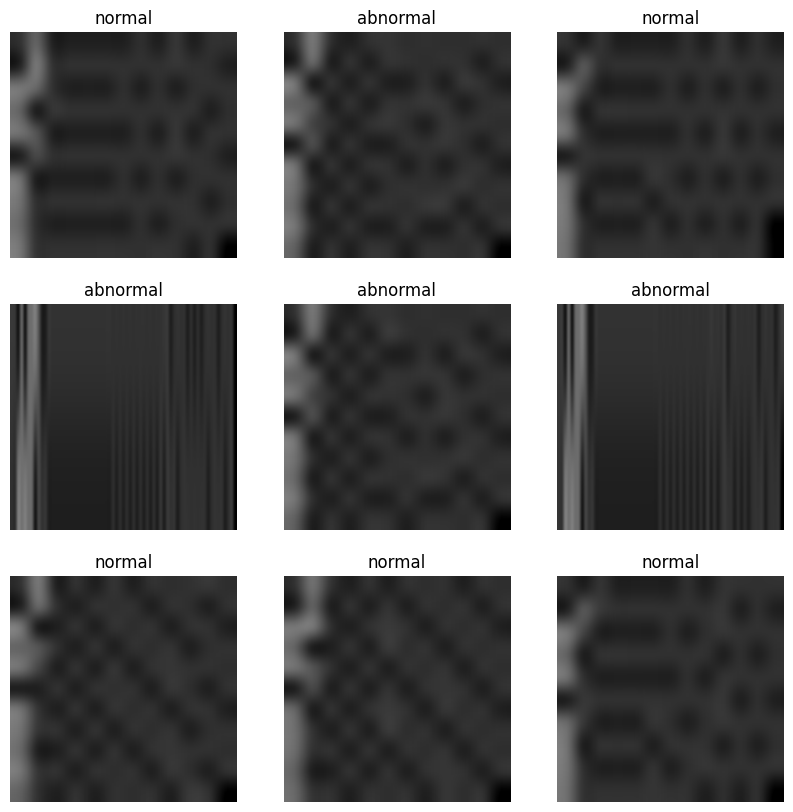

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [69]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [70]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [71]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [72]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.49803925


# Transfer Learning using Imagenet classification with ResNet V2 50

In [73]:
epochs=10
batchsize=10

import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow_hub as hub
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [74]:
hub_layer = hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5', trainable=True, arguments=dict(batch_norm_momentum=0.997))

model1 = Sequential()
model1.add(hub_layer)

# add two hidden layers for classification
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))

# add the prediction layer
model1.add(Dense(1, activation=('sigmoid')))

model1.build([None, 224, 224, 3])  # Batch input shape.

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              25615849  
                                                                 
 dense (Dense)               (None, 512)               513024    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26260458 (100.18 MB)
Trainable params: 26215018 (100.00 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


In [75]:
import keras

model1.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [76]:
history = model1.fit(
  train_ds,
  batch_size=batchsize,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
226/226 [==============================] - 105s 302ms/step - loss: 0.5598 - binary_accuracy: 0.9154 - val_loss: 0.9444 - val_binary_accuracy: 0.6829
Epoch 2/10
226/226 [==============================] - 66s 290ms/step - loss: 0.3887 - binary_accuracy: 0.9836 - val_loss: 0.7517 - val_binary_accuracy: 0.8426
Epoch 3/10
226/226 [==============================] - 66s 290ms/step - loss: 0.3530 - binary_accuracy: 0.9954 - val_loss: 0.5259 - val_binary_accuracy: 0.9468
Epoch 4/10
226/226 [==============================] - 66s 290ms/step - loss: 0.3443 - binary_accuracy: 0.9972 - val_loss: 0.4418 - val_binary_accuracy: 0.9690
Epoch 5/10
226/226 [==============================] - 66s 290ms/step - loss: 0.3402 - binary_accuracy: 0.9975 - val_loss: 0.4304 - val_binary_accuracy: 0.9734
Epoch 6/10
226/226 [==============================] - 65s 289ms/step - loss: 0.3387 - binary_accuracy: 0.9981 - val_loss: 0.4475 - val_binary_accuracy: 0.9667
Epoch 7/10
226/226 [=========================

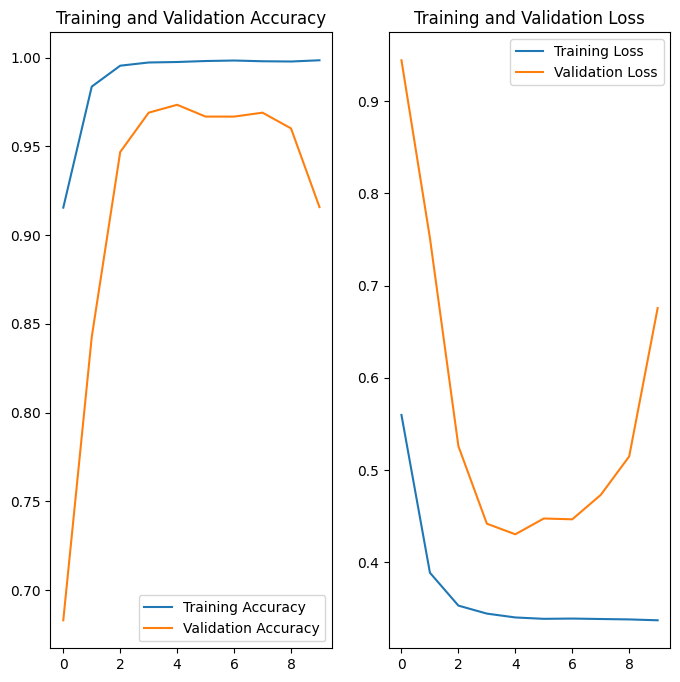

In [77]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
# to get predictions for all test data points
Y_pred_res = model1.predict(test_generator)

353/353 [==============================] - 30s 83ms/step


[[6237  161]
 [ 870 4004]]


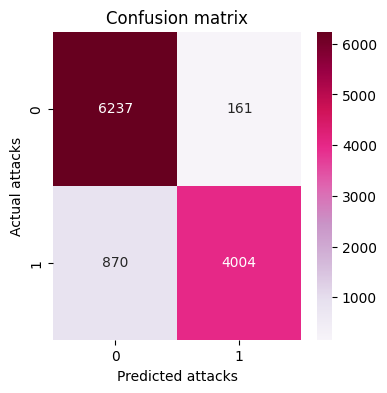

In [80]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [ ]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5862  560]
 [ 178 4672]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.97      0.91      0.94      6422
      normal       0.89      0.96      0.93      4850

    accuracy                           0.93     11272
   macro avg       0.93      0.94      0.93     11272
weighted avg       0.94      0.93      0.93     11272



In [81]:
hub_layer = hub.KerasLayer('https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5', trainable=True, arguments=dict(batch_norm_momentum=0.997))

model11 = Sequential()
model11.add(hub_layer)

# add two hidden layers for classification
model11.add(Dense(512, activation='relu'))
model11.add(Dense(256, activation='relu'))

# add the prediction layer
model11.add(Dense(1, activation=('sigmoid')))

model11.build([None, 224, 224, 3])  # Batch input shape.

model11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              25615849  
                                                                 
 dense_3 (Dense)             (None, 512)               513024    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26260458 (100.18 MB)
Trainable params: 26215018 (100.00 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


In [82]:
model11.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [84]:
history = model11.fit(
  train1_ds,
  batch_size=batchsize,
  validation_data=val1_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
179/179 [==============================] - 56s 312ms/step - loss: 0.5969 - binary_accuracy: 0.8983 - val_loss: 1.4032 - val_binary_accuracy: 0.4258
Epoch 2/10
179/179 [==============================] - 52s 290ms/step - loss: 0.4293 - binary_accuracy: 0.9646 - val_loss: 0.8784 - val_binary_accuracy: 0.7563
Epoch 3/10
179/179 [==============================] - 52s 292ms/step - loss: 0.3908 - binary_accuracy: 0.9765 - val_loss: 0.6182 - val_binary_accuracy: 0.9020
Epoch 4/10
179/179 [==============================] - 52s 291ms/step - loss: 0.3764 - binary_accuracy: 0.9837 - val_loss: 0.5334 - val_binary_accuracy: 0.9272
Epoch 5/10
179/179 [==============================] - 52s 292ms/step - loss: 0.3648 - binary_accuracy: 0.9869 - val_loss: 0.4063 - val_binary_accuracy: 0.9720
Epoch 6/10
179/179 [==============================] - 52s 291ms/step - loss: 0.3587 - binary_accuracy: 0.9891 - val_loss: 0.4241 - val_binary_accuracy: 0.9636
Epoch 7/10
179/179 [==========================

In [85]:
# to get predictions for all test data points
Y_pred_res = model11.predict(test_generator)

353/353 [==============================] - 29s 81ms/step


[[5754  644]
 [ 146 4728]]


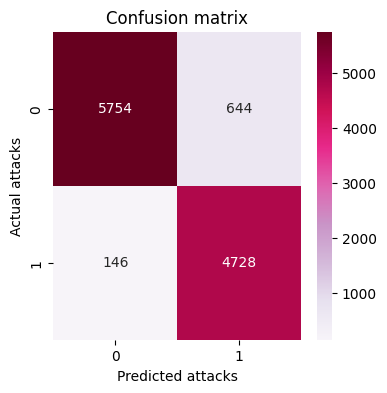

In [86]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [87]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5754  644]
 [ 146 4728]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.98      0.90      0.94      6398
      normal       0.88      0.97      0.92      4874

    accuracy                           0.93     11272
   macro avg       0.93      0.93      0.93     11272
weighted avg       0.93      0.93      0.93     11272



# Transfer Learning using Imagenet classification with ResNet 50

In [88]:
hub_layer1 = hub.KerasLayer('https://tfhub.dev/tensorflow/resnet_50/classification/1', trainable=True)

model2 = Sequential()
model2.add(hub_layer1)

# add two hidden layers for classification
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))

# add the prediction layer
model2.add(Dense(1, activation=('sigmoid')))

model2.build([None, 224, 224, 3])  # Batch input shape.

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              25612201  
                                                                 
 dense_6 (Dense)             (None, 512)               513024    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26256810 (100.16 MB)
Trainable params: 26203690 (99.96 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [89]:
import keras

model2.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [90]:
history = model2.fit(
  train_ds,
  batch_size=batchsize,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
226/226 [==============================] - 103s 336ms/step - loss: 1.1108 - binary_accuracy: 0.9002 - val_loss: 1.0696 - val_binary_accuracy: 0.9534
Epoch 2/10
226/226 [==============================] - 73s 325ms/step - loss: 1.0220 - binary_accuracy: 0.9568 - val_loss: 1.0156 - val_binary_accuracy: 0.8758
Epoch 3/10
226/226 [==============================] - 74s 325ms/step - loss: 0.9091 - binary_accuracy: 0.9612 - val_loss: 0.8528 - val_binary_accuracy: 0.9579
Epoch 4/10
226/226 [==============================] - 74s 327ms/step - loss: 0.7852 - binary_accuracy: 0.9706 - val_loss: 0.8118 - val_binary_accuracy: 0.8980
Epoch 5/10
226/226 [==============================] - 73s 325ms/step - loss: 0.6816 - binary_accuracy: 0.9719 - val_loss: 0.8491 - val_binary_accuracy: 0.7605
Epoch 6/10
226/226 [==============================] - 74s 326ms/step - loss: 0.5974 - binary_accuracy: 0.9756 - val_loss: 0.5662 - val_binary_accuracy: 0.9800
Epoch 7/10
226/226 [=========================

In [91]:
# to get predictions for all test data points
Y_pred_res = model2.predict(test_generator)

353/353 [==============================] - 35s 96ms/step


[[6285  113]
 [ 151 4723]]


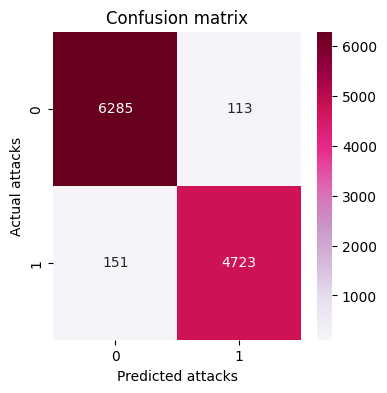

In [92]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [93]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[6285  113]
 [ 151 4723]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.98      0.98      0.98      6398
      normal       0.98      0.97      0.97      4874

    accuracy                           0.98     11272
   macro avg       0.98      0.98      0.98     11272
weighted avg       0.98      0.98      0.98     11272



In [94]:
hub_layer1 = hub.KerasLayer('https://tfhub.dev/tensorflow/resnet_50/classification/1', trainable=True)

model21 = Sequential()
model21.add(hub_layer1)

# add two hidden layers for classification
model21.add(Dense(512, activation='relu'))
model21.add(Dense(256, activation='relu'))

# add the prediction layer
model21.add(Dense(1, activation=('sigmoid')))

model21.build([None, 224, 224, 3])  # Batch input shape.

model21.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              25612201  
                                                                 
 dense_9 (Dense)             (None, 512)               513024    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 26256810 (100.16 MB)
Trainable params: 26203690 (99.96 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [95]:
model21.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [96]:
history = model21.fit(
  train1_ds,
  batch_size=batchsize,
  validation_data=val1_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
179/179 [==============================] - 87s 340ms/step - loss: 1.1232 - binary_accuracy: 0.8311 - val_loss: 1.0829 - val_binary_accuracy: 0.9244
Epoch 2/10
179/179 [==============================] - 58s 325ms/step - loss: 1.0442 - binary_accuracy: 0.9449 - val_loss: 1.0147 - val_binary_accuracy: 0.9524
Epoch 3/10
179/179 [==============================] - 59s 327ms/step - loss: 0.9744 - binary_accuracy: 0.9576 - val_loss: 0.9469 - val_binary_accuracy: 0.9524
Epoch 4/10
179/179 [==============================] - 58s 326ms/step - loss: 0.9015 - binary_accuracy: 0.9625 - val_loss: 0.8728 - val_binary_accuracy: 0.9468
Epoch 5/10
179/179 [==============================] - 58s 326ms/step - loss: 0.8260 - binary_accuracy: 0.9606 - val_loss: 0.8068 - val_binary_accuracy: 0.9468
Epoch 6/10
179/179 [==============================] - 58s 326ms/step - loss: 0.7500 - binary_accuracy: 0.9643 - val_loss: 0.7250 - val_binary_accuracy: 0.9552
Epoch 7/10
179/179 [==========================

In [97]:
# to get predictions for all test data points
Y_pred_res = model21.predict(test_generator)

353/353 [==============================] - 34s 95ms/step


[[5925  473]
 [ 231 4643]]


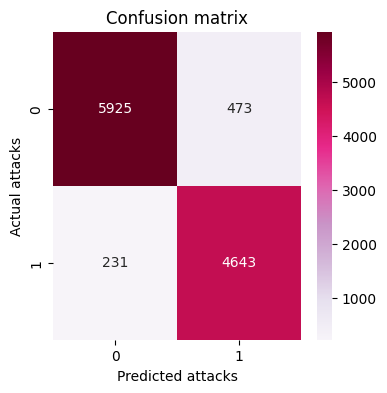

In [98]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [99]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5925  473]
 [ 231 4643]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.96      0.93      0.94      6398
      normal       0.91      0.95      0.93      4874

    accuracy                           0.94     11272
   macro avg       0.94      0.94      0.94     11272
weighted avg       0.94      0.94      0.94     11272



# Transfer Learning using Imagenet classification with MobileNet V1

In [100]:
hub_layer1 = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/5", trainable=True, arguments=dict(batch_norm_momentum=0.997))

model3 = Sequential()
model3.add(hub_layer1)
# add two hidden layers for classification
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu'))

# add the prediction layer
model3.add(Dense(1, activation=('sigmoid')))

model3.build([None, 224, 224, 3])  # Batch input shape.

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              4254889   
                                                                 
 dense_12 (Dense)            (None, 512)               513024    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 4899498 (18.69 MB)
Trainable params: 4877610 (18.61 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [101]:
model3.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [102]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', verbose=1, patience=2)
history = model3.fit(
  train_ds,
  batch_size=batchsize,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
226/226 [==============================] - 41s 122ms/step - loss: 0.6337 - binary_accuracy: 0.8253 - val_loss: 1.1997 - val_binary_accuracy: 0.4523
Epoch 2/10
226/226 [==============================] - 27s 118ms/step - loss: 0.3655 - binary_accuracy: 0.9547 - val_loss: 0.9199 - val_binary_accuracy: 0.6563
Epoch 3/10
226/226 [==============================] - 26s 117ms/step - loss: 0.3031 - binary_accuracy: 0.9773 - val_loss: 0.7426 - val_binary_accuracy: 0.7517
Epoch 4/10
226/226 [==============================] - 26s 117ms/step - loss: 0.2712 - binary_accuracy: 0.9903 - val_loss: 0.5582 - val_binary_accuracy: 0.8537
Epoch 5/10
226/226 [==============================] - 26s 117ms/step - loss: 0.2531 - binary_accuracy: 0.9963 - val_loss: 0.3988 - val_binary_accuracy: 0.9335
Epoch 6/10
226/226 [==============================] - 26s 117ms/step - loss: 0.2428 - binary_accuracy: 0.9988 - val_loss: 0.3532 - val_binary_accuracy: 0.9557
Epoch 7/10
226/226 [==========================

In [103]:
# to get predictions for all test data points
Y_pred_res = model3.predict(test_generator)

353/353 [==============================] - 15s 42ms/step


[[6325   73]
 [ 245 4629]]


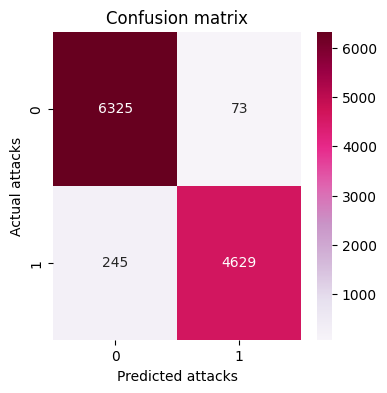

In [104]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [105]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[6325   73]
 [ 245 4629]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.96      0.99      0.98      6398
      normal       0.98      0.95      0.97      4874

    accuracy                           0.97     11272
   macro avg       0.97      0.97      0.97     11272
weighted avg       0.97      0.97      0.97     11272



In [106]:
hub_layer1 = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v1_100_224/classification/5", trainable=True, arguments=dict(batch_norm_momentum=0.997))

model31 = Sequential()
model31.add(hub_layer1)
# add two hidden layers for classification
model31.add(Dense(512, activation='relu'))
model31.add(Dense(256, activation='relu'))

# add the prediction layer
model31.add(Dense(1, activation=('sigmoid')))

model31.build([None, 224, 224, 3])  # Batch input shape.

model31.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1001)              4254889   
                                                                 
 dense_15 (Dense)            (None, 512)               513024    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 4899498 (18.69 MB)
Trainable params: 4877610 (18.61 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [107]:
model31.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [109]:
history = model31.fit(
  train1_ds,
  batch_size=batchsize,
  validation_data=val1_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
179/179 [==============================] - 33s 120ms/step - loss: 0.5783 - binary_accuracy: 0.8424 - val_loss: 1.0629 - val_binary_accuracy: 0.5210
Epoch 2/10
179/179 [==============================] - 21s 119ms/step - loss: 0.3847 - binary_accuracy: 0.9428 - val_loss: 1.2117 - val_binary_accuracy: 0.5630
Epoch 3/10
179/179 [==============================] - 21s 118ms/step - loss: 0.3363 - binary_accuracy: 0.9589 - val_loss: 1.1647 - val_binary_accuracy: 0.6162
Epoch 4/10
179/179 [==============================] - 21s 117ms/step - loss: 0.3123 - binary_accuracy: 0.9692 - val_loss: 1.0619 - val_binary_accuracy: 0.6499
Epoch 5/10
179/179 [==============================] - 21s 118ms/step - loss: 0.2921 - binary_accuracy: 0.9762 - val_loss: 0.7877 - val_binary_accuracy: 0.7311
Epoch 6/10
179/179 [==============================] - 21s 118ms/step - loss: 0.2815 - binary_accuracy: 0.9790 - val_loss: 0.4480 - val_binary_accuracy: 0.9300
Epoch 7/10
179/179 [==========================

In [110]:
# to get predictions for all test data points
Y_pred_res = model31.predict(test_generator)

353/353 [==============================] - 15s 43ms/step


[[5710  688]
 [ 155 4719]]


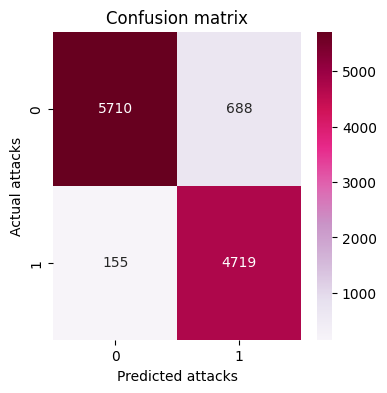

In [111]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [112]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5710  688]
 [ 155 4719]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.97      0.89      0.93      6398
      normal       0.87      0.97      0.92      4874

    accuracy                           0.93     11272
   macro avg       0.92      0.93      0.92     11272
weighted avg       0.93      0.93      0.93     11272



# Transfer Learning using Imagenet classification with ResNet V2 101

In [113]:
hub_layer1 = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5",trainable=True)

model4 = Sequential()
model4.add(hub_layer1)

# add two hidden layers for classification
model4.add(Dense(512, activation='relu'))
model4.add(Dense(256, activation='relu'))

# add the prediction layer
model4.add(Dense(1, activation=('sigmoid')))

model4.build([None, 224, 224, 3])  # Batch input shape.

model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1001)              44677609  
                                                                 
 dense_18 (Dense)            (None, 512)               513024    
                                                                 
 dense_19 (Dense)            (None, 256)               131328    
                                                                 
 dense_20 (Dense)            (None, 1)                 257       
                                                                 
Total params: 45322218 (172.89 MB)
Trainable params: 45224554 (172.52 MB)
Non-trainable params: 97664 (381.50 KB)
_________________________________________________________________


In [114]:
model4.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [115]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', verbose=1, patience=2)
history = model4.fit(
  train_ds,
  batch_size=batchsize,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
226/226 [==============================] - 167s 520ms/step - loss: 0.5563 - binary_accuracy: 0.9181 - val_loss: 0.5955 - val_binary_accuracy: 0.8980
Epoch 2/10
226/226 [==============================] - 116s 515ms/step - loss: 0.3983 - binary_accuracy: 0.9839 - val_loss: 0.4602 - val_binary_accuracy: 0.9557
Epoch 3/10
226/226 [==============================] - 116s 515ms/step - loss: 0.3674 - binary_accuracy: 0.9931 - val_loss: 0.4137 - val_binary_accuracy: 0.9778
Epoch 4/10
226/226 [==============================] - 116s 515ms/step - loss: 0.3590 - binary_accuracy: 0.9957 - val_loss: 0.4310 - val_binary_accuracy: 0.9712
Epoch 5/10
226/226 [==============================] - 116s 515ms/step - loss: 0.3561 - binary_accuracy: 0.9972 - val_loss: 0.4416 - val_binary_accuracy: 0.9690
Epoch 6/10
226/226 [==============================] - 116s 516ms/step - loss: 0.3536 - binary_accuracy: 0.9976 - val_loss: 0.4840 - val_binary_accuracy: 0.9645
Epoch 7/10
226/226 [====================

In [116]:
# to get predictions for all test data points
Y_pred_res = model4.predict(test_generator)

353/353 [==============================] - 52s 143ms/step


[[6314   84]
 [ 405 4469]]


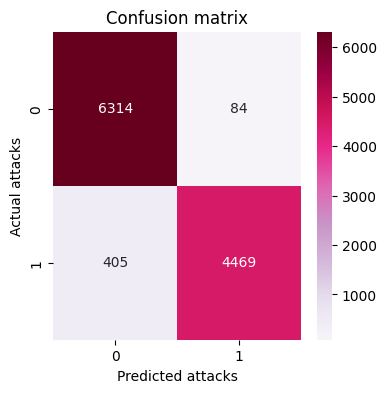

In [117]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [118]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[6314   84]
 [ 405 4469]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.94      0.99      0.96      6398
      normal       0.98      0.92      0.95      4874

    accuracy                           0.96     11272
   macro avg       0.96      0.95      0.96     11272
weighted avg       0.96      0.96      0.96     11272



In [119]:
hub_layer1 = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5",trainable=True)

model41 = Sequential()
model41.add(hub_layer1)

# add two hidden layers for classification
model41.add(Dense(512, activation='relu'))
model41.add(Dense(256, activation='relu'))

# add the prediction layer
model41.add(Dense(1, activation=('sigmoid')))

model41.build([None, 224, 224, 3])  # Batch input shape.

model41.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1001)              44677609  
                                                                 
 dense_21 (Dense)            (None, 512)               513024    
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 45322218 (172.89 MB)
Trainable params: 45224554 (172.52 MB)
Non-trainable params: 97664 (381.50 KB)
_________________________________________________________________


In [120]:
model41.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [121]:
history = model41.fit(
  train1_ds,
  batch_size=batchsize,
  validation_data=val1_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
179/179 [==============================] - 145s 523ms/step - loss: 0.5884 - binary_accuracy: 0.9042 - val_loss: 0.6596 - val_binary_accuracy: 0.8964
Epoch 2/10
179/179 [==============================] - 92s 515ms/step - loss: 0.4381 - binary_accuracy: 0.9636 - val_loss: 0.4734 - val_binary_accuracy: 0.9496
Epoch 3/10
179/179 [==============================] - 92s 516ms/step - loss: 0.4024 - binary_accuracy: 0.9797 - val_loss: 0.4753 - val_binary_accuracy: 0.9468
Epoch 4/10
179/179 [==============================] - 93s 517ms/step - loss: 0.3847 - binary_accuracy: 0.9853 - val_loss: 0.4565 - val_binary_accuracy: 0.9636
Epoch 5/10
179/179 [==============================] - 93s 518ms/step - loss: 0.3844 - binary_accuracy: 0.9846 - val_loss: 0.4786 - val_binary_accuracy: 0.9608
Epoch 6/10
179/179 [==============================] - 93s 517ms/step - loss: 0.3776 - binary_accuracy: 0.9888 - val_loss: 0.5093 - val_binary_accuracy: 0.9384
Epoch 7/10
179/179 [=========================

In [122]:
# to get predictions for all test data points
Y_pred_res = model41.predict(test_generator)

353/353 [==============================] - 52s 143ms/step


[[5529  869]
 [ 144 4730]]


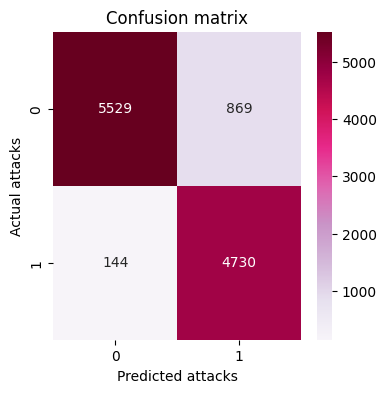

In [123]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [124]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5529  869]
 [ 144 4730]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.97      0.86      0.92      6398
      normal       0.84      0.97      0.90      4874

    accuracy                           0.91     11272
   macro avg       0.91      0.92      0.91     11272
weighted avg       0.92      0.91      0.91     11272



# Transfer Learning using Imagenet classification with VGG16

In [153]:
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

img_rows, img_cols, img_channel = 224, 224, 3

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

In [154]:
model5 = Sequential()
model5.add(Flatten(input_shape=base_model.output_shape[1:]))

# add two hidden layers for classification
model5.add(Dense(512, activation='relu'))
model5.add(Dense(256, activation='relu'))

# add the prediction layer
model5.add(Dense(1, activation=('sigmoid')))

model5 = Model(inputs=base_model.input, outputs=model5(base_model.output))
model5.build([None, 224, 224, 3])  # Batch input shape.
model5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [155]:
model5.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [156]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', verbose=1, patience=2)
history = model5.fit(
  train_ds,
  batch_size=batchsize,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
226/226 [==============================] - 94s 399ms/step - loss: 0.1868 - binary_accuracy: 0.9281 - val_loss: 0.0866 - val_binary_accuracy: 0.9667
Epoch 2/10
226/226 [==============================] - 93s 412ms/step - loss: 0.0896 - binary_accuracy: 0.9653 - val_loss: 0.0785 - val_binary_accuracy: 0.9623
Epoch 3/10
226/226 [==============================] - 93s 412ms/step - loss: 0.0683 - binary_accuracy: 0.9732 - val_loss: 0.0595 - val_binary_accuracy: 0.9778
Epoch 4/10
226/226 [==============================] - 93s 412ms/step - loss: 0.0541 - binary_accuracy: 0.9802 - val_loss: 0.0869 - val_binary_accuracy: 0.9712
Epoch 5/10
226/226 [==============================] - 93s 412ms/step - loss: 0.0463 - binary_accuracy: 0.9820 - val_loss: 0.0647 - val_binary_accuracy: 0.9756
Epoch 6/10
226/226 [==============================] - 93s 412ms/step - loss: 0.0380 - binary_accuracy: 0.9852 - val_loss: 0.0600 - val_binary_accuracy: 0.9778
Epoch 7/10
226/226 [==========================

In [157]:
# to get predictions for all test data points
Y_pred_res = model5.predict(test_generator)

353/353 [==============================] - 43s 121ms/step


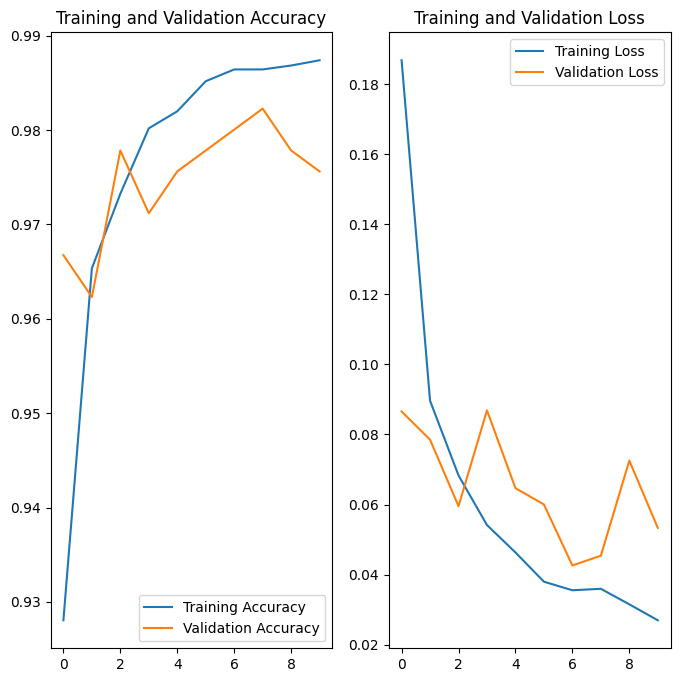

In [158]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[[6271  127]
 [ 123 4751]]


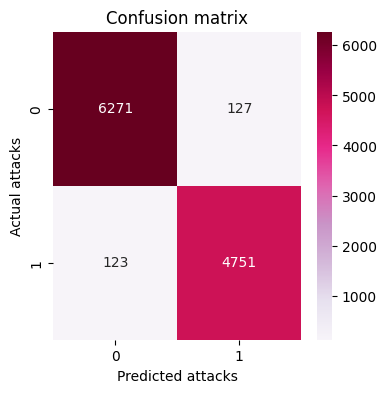

In [159]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [160]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[6271  127]
 [ 123 4751]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.98      0.98      0.98      6398
      normal       0.97      0.97      0.97      4874

    accuracy                           0.98     11272
   macro avg       0.98      0.98      0.98     11272
weighted avg       0.98      0.98      0.98     11272



In [133]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

In [135]:
model51 = Sequential()
model51.add(Flatten(input_shape=base_model.output_shape[1:]))

# add two hidden layers for classification
model51.add(Dense(512, activation='relu'))
model51.add(Dense(256, activation='relu'))

# add the prediction layer
model51.add(Dense(1, activation=('sigmoid')))

model51 = Model(inputs=base_model.input, outputs=model51(base_model.output))
model51.build([None, 224, 224, 3])  # Batch input shape.
model51.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [136]:
model51.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [137]:
history = model51.fit(
  train1_ds,
  batch_size=batchsize,
  validation_data=val1_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
179/179 [==============================] - 84s 447ms/step - loss: 0.2309 - binary_accuracy: 0.9077 - val_loss: 0.1010 - val_binary_accuracy: 0.9580
Epoch 2/10
179/179 [==============================] - 74s 411ms/step - loss: 0.1019 - binary_accuracy: 0.9606 - val_loss: 0.1027 - val_binary_accuracy: 0.9524
Epoch 3/10
179/179 [==============================] - 74s 412ms/step - loss: 0.0743 - binary_accuracy: 0.9708 - val_loss: 0.1042 - val_binary_accuracy: 0.9636
Epoch 4/10
179/179 [==============================] - 74s 412ms/step - loss: 0.0624 - binary_accuracy: 0.9776 - val_loss: 0.1492 - val_binary_accuracy: 0.9608
Epoch 5/10
179/179 [==============================] - 74s 412ms/step - loss: 0.0539 - binary_accuracy: 0.9799 - val_loss: 0.1209 - val_binary_accuracy: 0.9636
Epoch 6/10
179/179 [==============================] - 74s 412ms/step - loss: 0.0541 - binary_accuracy: 0.9767 - val_loss: 0.1165 - val_binary_accuracy: 0.9580
Epoch 7/10
179/179 [==========================

In [138]:
# to get predictions for all test data points
Y_pred_res = model51.predict(test_generator)

353/353 [==============================] - 43s 121ms/step


[[5439  959]
 [ 115 4759]]


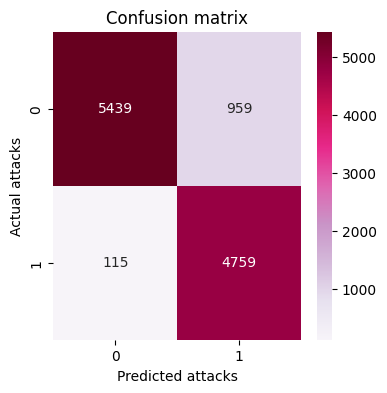

In [139]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [140]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5439  959]
 [ 115 4759]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.98      0.85      0.91      6398
      normal       0.83      0.98      0.90      4874

    accuracy                           0.90     11272
   macro avg       0.91      0.91      0.90     11272
weighted avg       0.92      0.90      0.91     11272



# Transfer Learning using Imagenet classification with VGG19

In [141]:
img_rows, img_cols, img_channel = 224, 224, 3

base_model1 = applications.VGG19(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

80134624/80134624 [==============================] - 4s 0us/step


In [142]:
model6 = Sequential()
model6.add(Flatten(input_shape=base_model1.output_shape[1:]))

# add two hidden layers for classification
model6.add(Dense(512, activation='relu'))
model6.add(Dense(256, activation='relu'))

# add the prediction layer
model6.add(Dense(1, activation=('sigmoid')))

model6 = Model(inputs=base_model1.input, outputs=model6(base_model1.output))
model6.build([None, 224, 224, 3])  # Batch input shape.
model6.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [143]:
model6.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [144]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', verbose=1, patience=2)
history = model6.fit(
  train_ds,
  batch_size=batchsize,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
226/226 [==============================] - 114s 487ms/step - loss: 0.1925 - binary_accuracy: 0.9278 - val_loss: 0.1185 - val_binary_accuracy: 0.9579
Epoch 2/10
226/226 [==============================] - 110s 488ms/step - loss: 0.0966 - binary_accuracy: 0.9651 - val_loss: 0.0920 - val_binary_accuracy: 0.9623
Epoch 3/10
226/226 [==============================] - 110s 488ms/step - loss: 0.0742 - binary_accuracy: 0.9702 - val_loss: 0.0726 - val_binary_accuracy: 0.9756
Epoch 4/10
226/226 [==============================] - 110s 488ms/step - loss: 0.0625 - binary_accuracy: 0.9759 - val_loss: 0.0534 - val_binary_accuracy: 0.9823
Epoch 5/10
226/226 [==============================] - 110s 487ms/step - loss: 0.0537 - binary_accuracy: 0.9789 - val_loss: 0.0780 - val_binary_accuracy: 0.9623
Epoch 6/10
226/226 [==============================] - 110s 488ms/step - loss: 0.0431 - binary_accuracy: 0.9829 - val_loss: 0.0697 - val_binary_accuracy: 0.9667
Epoch 7/10
226/226 [====================

In [145]:
# to get predictions for all test data points
Y_pred_res = model6.predict(test_generator)

353/353 [==============================] - 51s 144ms/step


[[6257  141]
 [ 106 4768]]


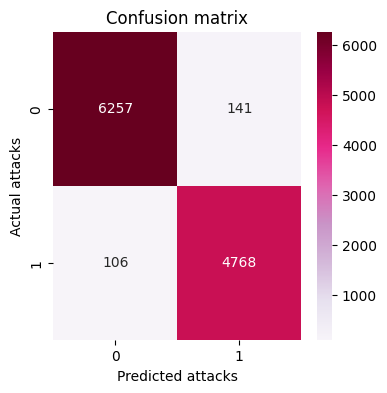

In [146]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [147]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[6257  141]
 [ 106 4768]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.98      0.98      0.98      6398
      normal       0.97      0.98      0.97      4874

    accuracy                           0.98     11272
   macro avg       0.98      0.98      0.98     11272
weighted avg       0.98      0.98      0.98     11272



In [161]:
img_rows, img_cols, img_channel = 224, 224, 3
base_model1 = applications.VGG19(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))

In [162]:
model61 = Sequential()
model61.add(Flatten(input_shape=base_model1.output_shape[1:]))

# add two hidden layers for classification
model61.add(Dense(512, activation='relu'))
model61.add(Dense(256, activation='relu'))

# add the prediction layer
model61.add(Dense(1, activation=('sigmoid')))

model61 = Model(inputs=base_model1.input, outputs=model61(base_model1.output))
model61.build([None, 224, 224, 3])  # Batch input shape.
model61.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [163]:
model61.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [164]:
history = model61.fit(
  train1_ds,
  batch_size=batchsize,
  validation_data=val1_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
179/179 [==============================] - 92s 490ms/step - loss: 0.2090 - binary_accuracy: 0.9142 - val_loss: 0.1126 - val_binary_accuracy: 0.9468
Epoch 2/10
179/179 [==============================] - 87s 488ms/step - loss: 0.1022 - binary_accuracy: 0.9604 - val_loss: 0.0802 - val_binary_accuracy: 0.9748
Epoch 3/10
179/179 [==============================] - 87s 487ms/step - loss: 0.0781 - binary_accuracy: 0.9701 - val_loss: 0.0970 - val_binary_accuracy: 0.9664
Epoch 4/10
179/179 [==============================] - 88s 489ms/step - loss: 0.0696 - binary_accuracy: 0.9753 - val_loss: 0.1149 - val_binary_accuracy: 0.9552
Epoch 5/10
179/179 [==============================] - 87s 487ms/step - loss: 0.0550 - binary_accuracy: 0.9788 - val_loss: 0.1051 - val_binary_accuracy: 0.9608
Epoch 6/10
179/179 [==============================] - 87s 488ms/step - loss: 0.0503 - binary_accuracy: 0.9809 - val_loss: 0.1333 - val_binary_accuracy: 0.9524
Epoch 7/10
179/179 [==========================

In [165]:
# to get predictions for all test data points
Y_pred_res = model61.predict(test_generator)

353/353 [==============================] - 52s 147ms/step


[[5396 1002]
 [ 105 4769]]


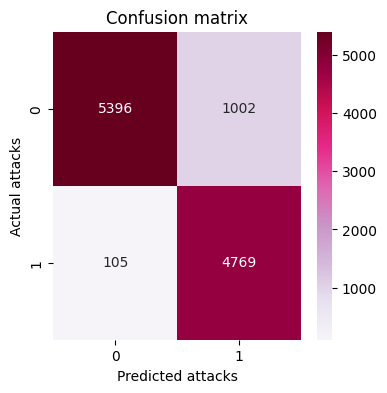

In [166]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd',  fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [167]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5396 1002]
 [ 105 4769]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.98      0.84      0.91      6398
      normal       0.83      0.98      0.90      4874

    accuracy                           0.90     11272
   macro avg       0.90      0.91      0.90     11272
weighted avg       0.91      0.90      0.90     11272



# Deep Learning for comparison using Basic Keras DL Model with 3 Conv2D blocks & 3 Max Pooling Layers

In [207]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation=('sigmoid'))
])

In [208]:
import keras
model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [209]:
history = model.fit(
  train_ds,
  batch_size=batchsize,
  validation_data=val_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
226/226 [==============================] - 8s 28ms/step - loss: 0.6760 - binary_accuracy: 0.5652 - val_loss: 0.6617 - val_binary_accuracy: 0.5787
Epoch 2/10
226/226 [==============================] - 6s 27ms/step - loss: 0.6512 - binary_accuracy: 0.6108 - val_loss: 0.6316 - val_binary_accuracy: 0.7140
Epoch 3/10
226/226 [==============================] - 6s 27ms/step - loss: 0.6083 - binary_accuracy: 0.7204 - val_loss: 0.5854 - val_binary_accuracy: 0.7761
Epoch 4/10
226/226 [==============================] - 6s 28ms/step - loss: 0.5601 - binary_accuracy: 0.7735 - val_loss: 0.5311 - val_binary_accuracy: 0.7783
Epoch 5/10
226/226 [==============================] - 6s 28ms/step - loss: 0.5143 - binary_accuracy: 0.7843 - val_loss: 0.5303 - val_binary_accuracy: 0.7206
Epoch 6/10
226/226 [==============================] - 6s 28ms/step - loss: 0.4884 - binary_accuracy: 0.7904 - val_loss: 0.4671 - val_binary_accuracy: 0.8004
Epoch 7/10
226/226 [==============================] - 6s 2

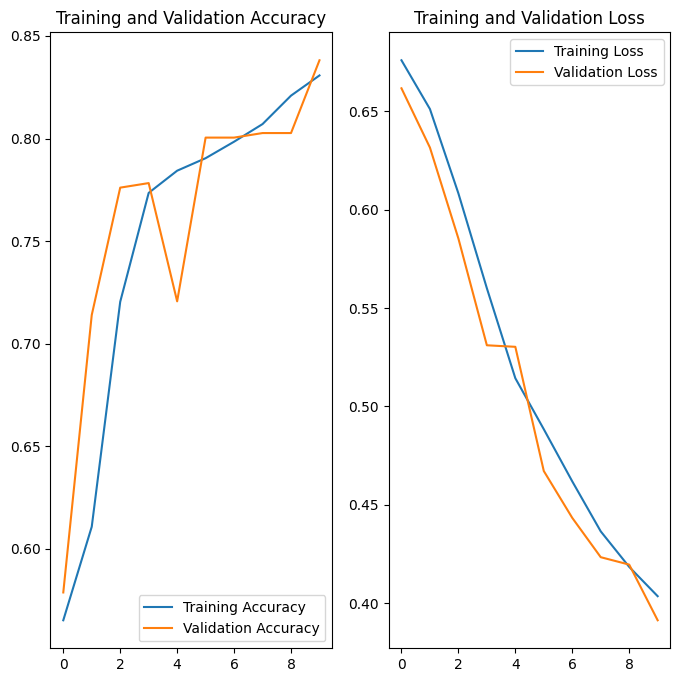

In [210]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [211]:
# to get predictions for all test data points
Y_pred_res = model.predict(test_generator)

353/353 [==============================] - 14s 40ms/step


[[5919  479]
 [1392 3482]]


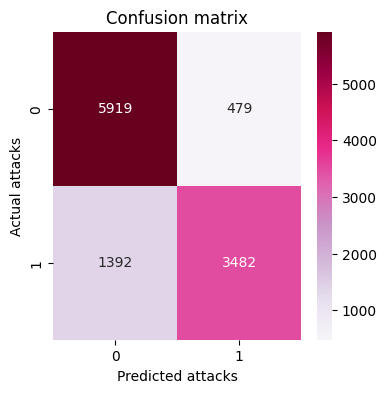

In [212]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [213]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[5919  479]
 [1392 3482]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.81      0.93      0.86      6398
      normal       0.88      0.71      0.79      4874

    accuracy                           0.83     11272
   macro avg       0.84      0.82      0.83     11272
weighted avg       0.84      0.83      0.83     11272



In [214]:
model01 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation=('sigmoid'))
])

In [215]:
import keras
model01.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [216]:
history = model01.fit(
  train1_ds,
  batch_size=batchsize,
  validation_data=val1_ds,
  epochs=epochs,
  verbose=1
  #callbacks=callback
)

Epoch 1/10
179/179 [==============================] - 6s 29ms/step - loss: 0.6807 - binary_accuracy: 0.5723 - val_loss: 0.6701 - val_binary_accuracy: 0.5770
Epoch 2/10
179/179 [==============================] - 5s 28ms/step - loss: 0.6541 - binary_accuracy: 0.6450 - val_loss: 0.6391 - val_binary_accuracy: 0.6807
Epoch 3/10
179/179 [==============================] - 5s 28ms/step - loss: 0.6163 - binary_accuracy: 0.6873 - val_loss: 0.5999 - val_binary_accuracy: 0.7423
Epoch 4/10
179/179 [==============================] - 5s 28ms/step - loss: 0.5777 - binary_accuracy: 0.7201 - val_loss: 0.5938 - val_binary_accuracy: 0.6723
Epoch 5/10
179/179 [==============================] - 5s 28ms/step - loss: 0.5448 - binary_accuracy: 0.7356 - val_loss: 0.5286 - val_binary_accuracy: 0.7339
Epoch 6/10
179/179 [==============================] - 5s 29ms/step - loss: 0.5129 - binary_accuracy: 0.7512 - val_loss: 0.5011 - val_binary_accuracy: 0.7339
Epoch 7/10
179/179 [==============================] - 5s 2

In [217]:
# to get predictions for all test data points
Y_pred_res = model01.predict(test_generator)

353/353 [==============================] - 16s 46ms/step


[[3834 2564]
 [ 825 4049]]


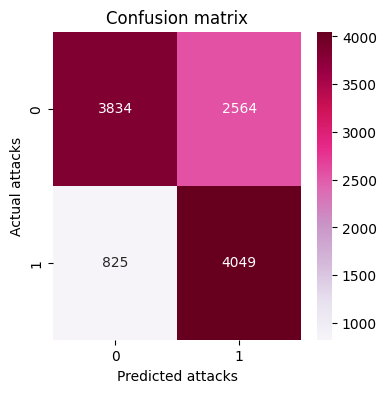

In [218]:
conf_matrix_res = confusion_matrix(test_generator.classes, np.round(Y_pred_res))
print(conf_matrix_res)
# Display of the confusion matrix as a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix_res, annot=True, cmap='PuRd', fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted attacks')
plt.ylabel('Actual attacks')
plt.show()

In [219]:
cm_res = np.array2string(conf_matrix_res)
print(conf_matrix_res)
print("=============================================================================================")
print('Classification Report')
target_names = ['abnormal','normal']
class_rep_res = classification_report(test_generator.classes, np.round(Y_pred_res), target_names=target_names)
print(class_rep_res)

[[3834 2564]
 [ 825 4049]]
Classification Report
              precision    recall  f1-score   support

    abnormal       0.82      0.60      0.69      6398
      normal       0.61      0.83      0.70      4874

    accuracy                           0.70     11272
   macro avg       0.72      0.71      0.70     11272
weighted avg       0.73      0.70      0.70     11272

